# Project Overview

In this project, we will explore a customer database and use data analysis techniques to understand customer churn. We will use Python and SQL to extract and clean the data, and create visualizations using Tableau to identify trends and insights related to customer behavior.

# Dataset

We will use a sample customer database that includes customer demographic information (age, gender, location), purchase history, and whether or not the customer has churned. The dataset contains 10 customers with data that will be used to calculate churn rates and other metrics.

Let's load our python libraries 

In [1]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Now we need to create a dataset for the customers by making a dictionary 
data = {'customer_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'age': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70],
        'gender': ['Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'location': ['USA', 'Canada', 'UK', 'USA', 'USA', 'Canada', 'UK', 'USA', 'USA', 'Canada'],
        'purchase_history': ['$100', '$250', '$500', '$75', '$300', '$150', '$200', '$50', '$100', '$1000'],
        'churned': ['No', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No']}

# Create a dataframe 
df = pd.DataFrame(data) 

# Save as an excel file for later use
df.to_excel('customers_data.xlsx', index=False)

Our goal is to analyze customer data and identify key factors that are driving customer churn.
Now we'll use SQL to clean and extract the data. 

In [8]:
# Read excel file into Pandas DataFrame
df = pd.read_excel('customers_data.xlsx')

# Create a connection to the SQLite3 database 
conn = sqlite3.connect('customer_data.db')

# Save the DataFrame to a SQLite3 database
df.to_sql('customer_data', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

Now that we set up our SQL database, now we can start the data cleaning process. Here is what our data looks like

In [37]:
# Create a connection to the SQLite3 database 
conn = sqlite3.connect('customer_data.db')

# Create a cursor 
c = conn.cursor()

# Execute the query and fetch the results
c.execute("SELECT * FROM customer_data")

# fetch the results 
pd.DataFrame(c.fetchall(), columns= ['customer_id', 'age', 'gender', 'location', 'purchase_history', 'churned']).set_index('customer_id')

# Either commit the action
# conn.commit()
          
# Close the connection 
# conn.close

,age,gender,location,purchase_history,churned
customer_id,,,,,
1,25,Female,USA,$100,No
2,30,Male,Canada,$250,No
3,35,Male,UK,$500,Yes
4,40,Female,USA,$75,No
5,45,Male,USA,$300,Yes
6,50,Female,Canada,$150,No
7,55,Male,UK,$200,No
8,60,Female,USA,$50,No
9,65,Male,USA,$100,Yes


In [34]:
# Remove duplicates example
c.execute("DELETE FROM customer_data WHERE rowid NOT IN(SELECT MIN(rowid) FROM customer_data GROUP BY customer_id);")
print(c.fetchall())

[]


In [35]:
# Remove any null example
c.execute("DELETE FROM customer_data WHERE age IS NULL OR gender IS NULL OR location IS NULL OR purchase_history IS NULL OR churned IS NULL;")
print(c.fetchall())

[]


In [33]:
# Testing out SQLite3 before commencing 
c.execute("SELECT count(age) FROM customer_data WHERE age>40")

print(c.fetchall())

[(6,)]


Now let's analyze and calculate the various KPIs and metrics like the customer retention rate, churn rate, customer lifetime value (CLV), customer acquisition cost (CAC), etc.

In [78]:
# customer rentention rate calculation:

# Number of customers
c.execute("SELECT COUNT(customer_id) FROM customer_data")
total_customers = c.fetchone()[0]

# Number of customers who churned 
c.execute("SELECT COUNT(customer_id) FROM customer_data WHERE churned='Yes'")
churned_customers = c.fetchone()[0]

# customer rentention rate 
retention_rate = (total_customers - churned_customers)/ total_customers
print(f"Retension rate: {retention_rate:.2%}")

Retension rate: 70.00%


In [79]:
# churn rate 
churn_rate = churned_customers / total_customers
print(f"Churn rate: {churn_rate:.2%}")

Churn rate: 30.00%


In [94]:
# Calculate the customer lifetime value (CLV):

# Total Revenue Generated 
c.execute("SELECT SUM(purchase_history) FROM customer_data")
c.fetchone() # Showing as 0 because it is not an integer

# So do it again but use the cast function to change it 
c.execute("SELECT SUM(CAST(REPLACE(purchase_history, '$', '')AS integer)) FROM customer_data")
total_revenue = c.fetchone()[0]
print(f"Total Revenue: {total_revenue}")

# Average revenue per customer 
avg_revenue_per_customer = total_revenue/total_customers
print(f"Average revenue per customer: {avg_revenue_per_customer}")

# customer lifetime value (CLV)
clv = avg_revenue_per_customer * retention_rate 
print(f"Customer Lifetime Value: {clv}")

Total Revenue: 2725
Average revenue per customer: 272.5
Customer Lifetime Value: 190.75


In [133]:
# Print all of the results together
print("KPIs AND METRICS:", "\n")
print(f"Total customers: {total_customers}")
print(f"churned customers: {churned_customers}")
print(f"Retension rate: {retention_rate:.2%}")
print(f"Churn rate: {churn_rate:.2%}")
print(f"Total Revenue: {total_revenue}")
print(f"Average revenue per customer: {avg_revenue_per_customer}")
print(f"Customer Lifetime Value: {clv}")
conn.close()

KPIs AND METRICS: 

Total customers: 10
churned customers: 3
Retension rate: 70.00%
Churn rate: 30.00%
Total Revenue: 2725
Average revenue per customer: 272.5
Customer Lifetime Value: 190.75


# Data Visualization 

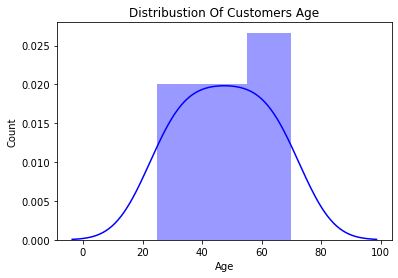

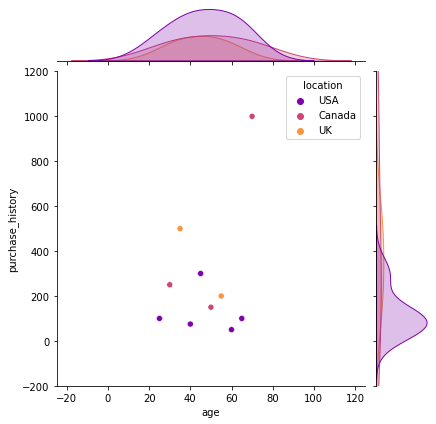

In [130]:
# Plot distribustion of customers age
sns.distplot(df['age'], color='b')
plt.title('Distribustion Of Customers Age')
plt.ylabel('Count')
plt.xlabel('Age')
plt.show()

# Plot the revenue compared to each country and separated by age
df['purchase_history']= df['purchase_history'].replace('[\$,]', '', regex=True).astype(float) # converted to a numeric value
graph= sns.jointplot(y=df['purchase_history'], x=df['age'], hue=df['location'], palette= 'plasma')
plt.ylim(-200, 1200)
plt.show()                 